In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [3]:
# Dataset

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [7]:
# model define

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
    
    def forward(self, x):
        return self.linear(x)

In [8]:
# model initiate
model = LinearRegression()

# optimizer define
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

# cost list
costdata = []

In [9]:
nb_epochs = 2000
for epoch in range(nb_epochs + 1):
    # H(x)
    prediction = model(x_train)
    
    #cost
    cost = F.mse_loss(prediction, y_train)
    costdata.append([epoch, float(cost)])

    # backward
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0: print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225990
Epoch  200/2000 Cost: 0.223913
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210559
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206762
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204529
Epoch 1600/2000 Cost: 0.203481
Epoch 1700/2000 Cost: 0.202486
Epoch 1800/2000 Cost: 0.201539
Epoch 1900/2000 Cost: 0.200634
Epoch 2000/2000 Cost: 0.199770


In [10]:
n_var = torch.FloatTensor([[73, 80, 75]])

print(model(n_var))

tensor([[151.2306]], grad_fn=<AddmmBackward0>)


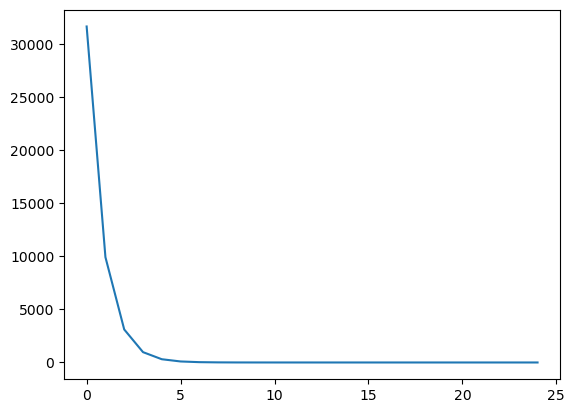

In [11]:
# gradient for epoch 1 ~ 26

plt.plot(np.transpose(costdata)[0][:25], np.transpose(costdata)[1][:25], '-')